In [1]:
from data_functions import *

In [2]:
CCB = pd.read_csv('./Data/Colombia - Cementos Argos SA (CCB).csv')

In [3]:
CCB

,Date,Price,Open,High,Low,Vol.,Change %
0,"Mar 31, 2021","5,150.00","5,100.00","5,170.00","5,100.00",212.44K,0.98%
1,"Mar 30, 2021","5,100.00","5,010.00","5,100.00","5,010.00",583.70K,1.09%
2,"Mar 29, 2021","5,045.00","5,020.00","5,045.00","5,015.00",117.54K,0.50%
3,"Mar 26, 2021","5,020.00","5,085.00","5,085.00","4,980.00",203.46K,-0.20%
4,"Mar 25, 2021","5,030.00","5,035.00","5,045.00","4,950.00",317.06K,0.10%
...,...,...,...,...,...,...,...
299,"Jan 08, 2020","6,880.00","6,940.00","6,950.00","6,880.00",84.93K,-1.01%
300,"Jan 07, 2020","6,950.00","6,950.00","6,950.00","6,850.00",168.71K,-0.71%
301,"Jan 03, 2020","7,000.00","7,040.00","7,100.00","6,960.00",470.77K,-1.69%
302,"Jan 02, 2020","7,120.00","7,300.00","7,300.00","7,120.00",138.96K,-2.47%


In [4]:
CCB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      304 non-null    object
 1   Price     304 non-null    object
 2   Open      304 non-null    object
 3   High      304 non-null    object
 4   Low       304 non-null    object
 5   Vol.      303 non-null    object
 6   Change %  303 non-null    object
dtypes: object(7)
memory usage: 16.8+ KB


In [5]:
## drop last row because it doesn't contain relevant information

CCB.drop(303, inplace=True)

In [6]:
## change date column to datetime

CCB['Date'] = pd.to_datetime(CCB['Date'], format='%b %d, %Y')

In [7]:
## change price columns to integer

CCB['Price'] = CCB['Price'].str.replace(',', '').astype(float)
CCB['Open'] = CCB['Open'].str.replace(',', '').astype(float)
CCB['High'] = CCB['High'].str.replace(',', '').astype(float)
CCB['Low'] = CCB['Low'].str.replace(',', '').astype(float)

In [8]:
CCB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      303 non-null    datetime64[ns]
 1   Price     303 non-null    float64       
 2   Open      303 non-null    float64       
 3   High      303 non-null    float64       
 4   Low       303 non-null    float64       
 5   Vol.      303 non-null    object        
 6   Change %  303 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 18.9+ KB


In [9]:
CCB.sort_values(['Date'], ascending=True, ignore_index=True, inplace=True)
CCB

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-01-02,7120.0,7300.0,7300.0,7120.0,138.96K,-2.47%
1,2020-01-03,7000.0,7040.0,7100.0,6960.0,470.77K,-1.69%
2,2020-01-07,6950.0,6950.0,6950.0,6850.0,168.71K,-0.71%
3,2020-01-08,6880.0,6940.0,6950.0,6880.0,84.93K,-1.01%
4,2020-01-09,6810.0,6880.0,6890.0,6800.0,262.89K,-1.02%
...,...,...,...,...,...,...,...
298,2021-03-25,5030.0,5035.0,5045.0,4950.0,317.06K,0.10%
299,2021-03-26,5020.0,5085.0,5085.0,4980.0,203.46K,-0.20%
300,2021-03-29,5045.0,5020.0,5045.0,5015.0,117.54K,0.50%
301,2021-03-30,5100.0,5010.0,5100.0,5010.0,583.70K,1.09%


In [10]:
## find rows for 2021 data

CCB.loc[CCB['Date'] > '2020-12-31']

,Date,Price,Open,High,Low,Vol.,Change %
242,2021-01-04,6100.0,6110.0,6160.0,5900.0,454.99K,-1.29%
243,2021-01-05,5860.0,6000.0,6000.0,5860.0,457.03K,-3.93%
244,2021-01-06,5865.0,5860.0,5955.0,5860.0,338.98K,0.09%
245,2021-01-07,5700.0,5860.0,5985.0,5700.0,539.18K,-2.81%
246,2021-01-08,5870.0,5805.0,5870.0,5790.0,154.80K,2.98%
...,...,...,...,...,...,...,...
298,2021-03-25,5030.0,5035.0,5045.0,4950.0,317.06K,0.10%
299,2021-03-26,5020.0,5085.0,5085.0,4980.0,203.46K,-0.20%
300,2021-03-29,5045.0,5020.0,5045.0,5015.0,117.54K,0.50%
301,2021-03-30,5100.0,5010.0,5100.0,5010.0,583.70K,1.09%


Because the length of 2021 data for CCB is 61, I will be putting the removing the first date of 2021 from the testing data and putting it into the training data. The reason for this is because we need a test dataset that is divisible by 5 for the weekly and monthly test data, so that we have a uniform shape in the test data set.

In [11]:
## split training data and testing data, testing data will be the year of 2021

training_data = CCB[['Date', 'Price']][:243]
testing_data = CCB[['Date', 'Price']][243:]

In [29]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(CCB[['Price']])
scaled_train_data = scaled_data[:245]

I am also increasing the size of the scaled train dataset to be divisible by 5 so that I can split the data for the dependent and independent variables into the same shape for weekly and monthly data.

# PyTorch
## Daily

In [15]:
X_train, y_train = get_train_data(scaled_train_data, 14)
X_test, y_test = get_test_data(CCB, testing_data, scaler, 14)

In [16]:
X_train = torch.from_numpy(X_train).type(torch.Tensor)
X_test = torch.from_numpy(X_test).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)
y_test = torch.from_numpy(y_test).type(torch.Tensor)

In [17]:
model = LSTM(input_dim=1, hidden_dim=50, output_dim=1, num_layers=2)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)
print(model)

LSTM(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)


In [18]:
num_epochs = 200

hist = np.zeros(num_epochs)
lstm = []
for t in range(num_epochs):
    y_train_pred = model(X_train)    
    
    loss = criterion(y_train_pred, y_train)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()    
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch  0 MSE:  0.27079299092292786
Epoch  1 MSE:  0.11076939105987549
Epoch  2 MSE:  0.047198813408613205
Epoch  3 MSE:  0.040821995586156845
Epoch  4 MSE:  0.03570083901286125
Epoch  5 MSE:  0.04048450291156769
Epoch  6 MSE:  0.038384683430194855
Epoch  7 MSE:  0.03311839699745178
Epoch  8 MSE:  0.031548239290714264
Epoch  9 MSE:  0.03381098061800003
Epoch  10 MSE:  0.0320049524307251
Epoch  11 MSE:  0.02728573977947235
Epoch  12 MSE:  0.025460924953222275
Epoch  13 MSE:  0.024911629036068916
Epoch  14 MSE:  0.02113424800336361
Epoch  15 MSE:  0.01463122945278883
Epoch  16 MSE:  0.01522864494472742
Epoch  17 MSE:  0.008400975726544857
Epoch  18 MSE:  0.010060594417154789
Epoch  19 MSE:  0.010227089747786522
Epoch  20 MSE:  0.013033912517130375
Epoch  21 MSE:  0.008468111976981163
Epoch  22 MSE:  0.007911000400781631
Epoch  23 MSE:  0.006847950164228678
Epoch  24 MSE:  0.005926593206822872
Epoch  25 MSE:  0.00740420026704669
Epoch  26 MSE:  0.007172644603997469
Epoch  27 MSE:  0.006753

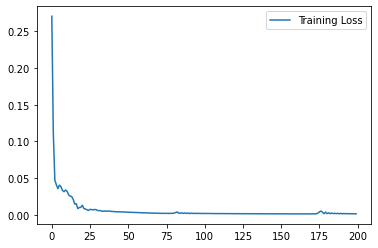

In [19]:
plt.plot(hist, label='Training Loss')
plt.legend()
plt.show()

In [20]:
y_train_pred = model(X_train)
y_test_pred = model(X_test)

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test.detach().numpy())

trainScore = np.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 178.94 RMSE
Test Score: 153.69 RMSE


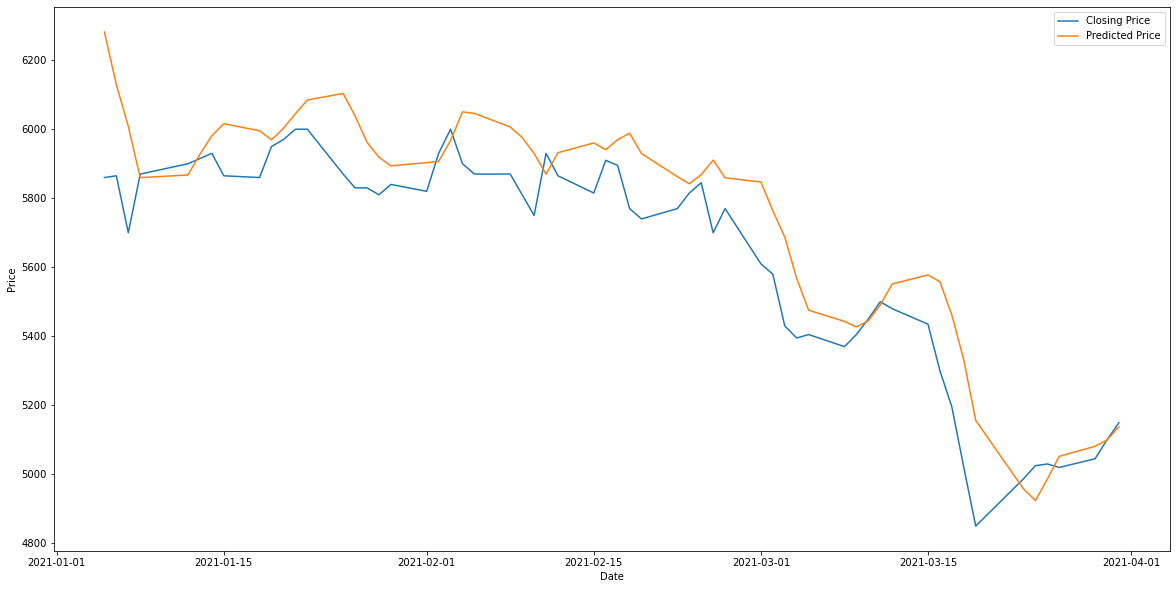

In [21]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], y_test, label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [22]:
boll_daily = CCB[['Date']]

price = np.array(training_data['Price'])
price = np.append(price, y_test_pred.reshape(-1))

boll_daily['Price'] = price
boll_daily['SMA'] = sma(boll_daily['Price'], 9)
boll_daily['upper_bb'], boll_daily['lower_bb'] = bollinger(boll_daily['Price'], boll_daily['SMA'], 9)
boll_daily

C:\Users\Chris\AppData\Local\Temp/ipykernel_17900/1521879601.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_daily['Price'] = price
C:\Users\Chris\AppData\Local\Temp/ipykernel_17900/1521879601.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_daily['SMA'] = sma(boll_daily['Price'], 9)
C:\Users\Chris\AppData\Local\Temp/ipykernel_17900/1521879601.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

,Date,Price,SMA,upper_bb,lower_bb
0,2020-01-02,7120.000000,NaN,NaN,NaN
1,2020-01-03,7000.000000,NaN,NaN,NaN
2,2020-01-07,6950.000000,NaN,NaN,NaN
3,2020-01-08,6880.000000,NaN,NaN,NaN
4,2020-01-09,6810.000000,NaN,NaN,NaN
...,...,...,...,...,...
298,2021-03-25,4986.094238,5278.198351,5829.342847,4727.053854
299,2021-03-26,5052.249023,5222.724392,5750.064687,4695.384098
300,2021-03-29,5081.264160,5167.554308,5627.292192,4707.816424
301,2021-03-30,5099.336426,5116.585720,5471.199290,4761.972151


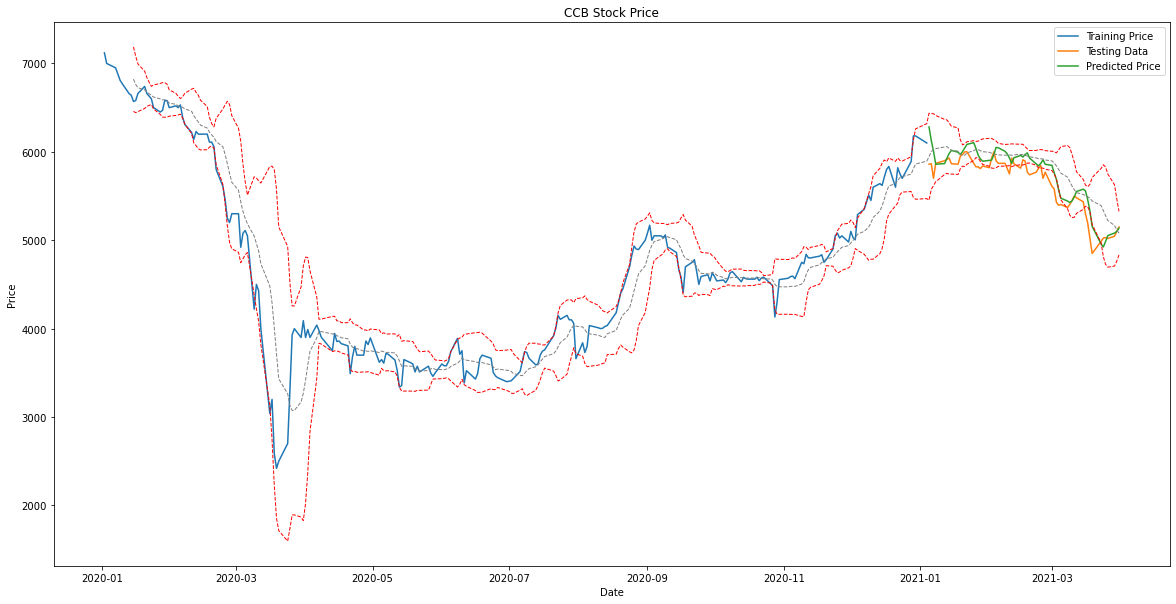

In [23]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_daily['Date'], boll_daily['upper_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'], boll_daily['lower_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'], boll_daily['SMA'], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('CCB Stock Price')
plt.legend()
plt.show()

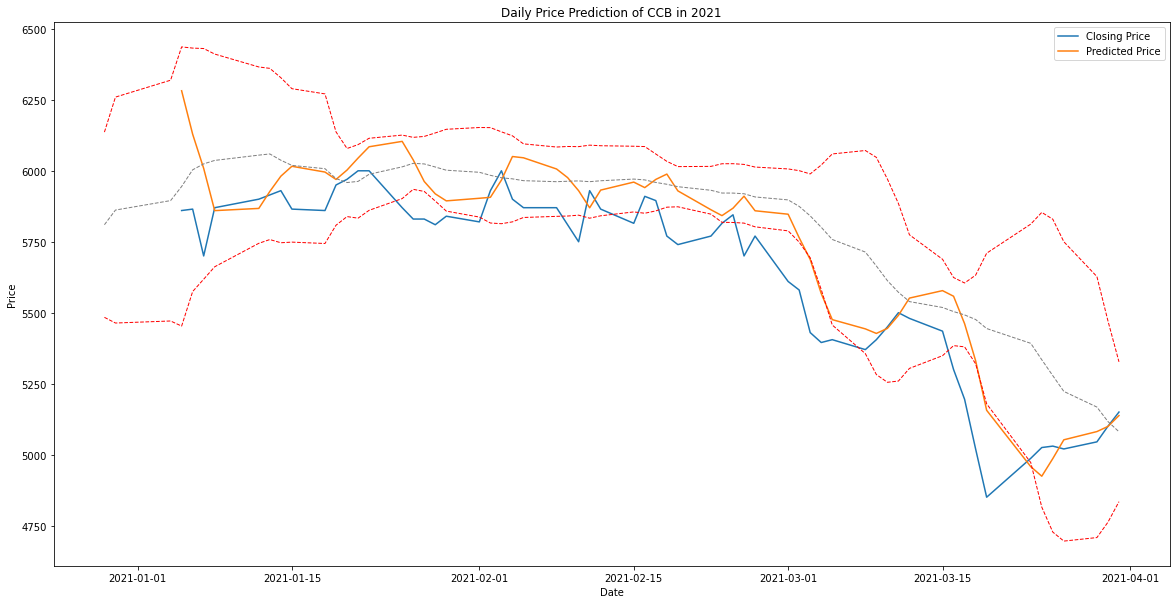

In [24]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], testing_data['Price'], label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_daily['Date'][240:], boll_daily['upper_bb'][240:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'][240:], boll_daily['lower_bb'][240:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'][240:], boll_daily['SMA'][240:], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Daily Price Prediction of CCB in 2021')
plt.legend()
plt.show()

## Weekly

In [30]:
model = LSTM(input_dim=1, hidden_dim=50, output_dim=5, num_layers=2)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

print(model)

LSTM(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=5, bias=True)
)


In [33]:
X_train_w, y_train_w = get_weekly_train_data(scaled_train_data, 15)
X_test_w, y_test_w = get_weekly_test_data(CCB, testing_data, scaler, 15)

In [34]:
X_train_w = torch.from_numpy(X_train_w).type(torch.Tensor)
X_test_w = torch.from_numpy(X_test_w).type(torch.Tensor)
y_train_w = torch.from_numpy(y_train_w).type(torch.Tensor)
y_test_w = torch.from_numpy(y_test_w).type(torch.Tensor)

In [35]:
num_epochs = 200

hist = np.zeros(num_epochs)
lstm = []
for t in range(num_epochs):
    y_train_pred = model(X_train_w)    
    
    loss = criterion(y_train_pred, y_train_w)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()    
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch  0 MSE:  0.25981849431991577
Epoch  1 MSE:  0.18824900686740875
Epoch  2 MSE:  0.10028981417417526
Epoch  3 MSE:  0.22781416773796082
Epoch  4 MSE:  0.04332078993320465
Epoch  5 MSE:  0.060991574078798294
Epoch  6 MSE:  0.07529076933860779
Epoch  7 MSE:  0.07340975850820541
Epoch  8 MSE:  0.06481083482503891
Epoch  9 MSE:  0.057792145758867264
Epoch  10 MSE:  0.05569154769182205
Epoch  11 MSE:  0.053811151534318924
Epoch  12 MSE:  0.04814957454800606
Epoch  13 MSE:  0.041473060846328735
Epoch  14 MSE:  0.03686404973268509
Epoch  15 MSE:  0.034877900034189224
Epoch  16 MSE:  0.034627266228199005
Epoch  17 MSE:  0.0350412018597126
Epoch  18 MSE:  0.03537946939468384
Epoch  19 MSE:  0.03530862554907799
Epoch  20 MSE:  0.034813910722732544
Epoch  21 MSE:  0.03405651077628136
Epoch  22 MSE:  0.03321884945034981
Epoch  23 MSE:  0.03237267956137657
Epoch  24 MSE:  0.031417906284332275
Epoch  25 MSE:  0.030136151239275932
Epoch  26 MSE:  0.028341732919216156
Epoch  27 MSE:  0.02601228095

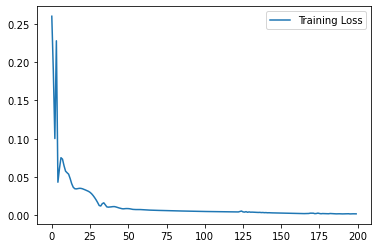

In [36]:
plt.plot(hist, label='Training Loss')
plt.legend()
plt.show()

In [37]:
y_train_pred = model(X_train_w)
y_test_pred = model(X_test_w)

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_w.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_w.reshape(12, 5).detach().numpy())

trainScore = np.sqrt(mean_squared_error(y_train_w[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test_w[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 4607.95 RMSE
Test Score: 5683.02 RMSE


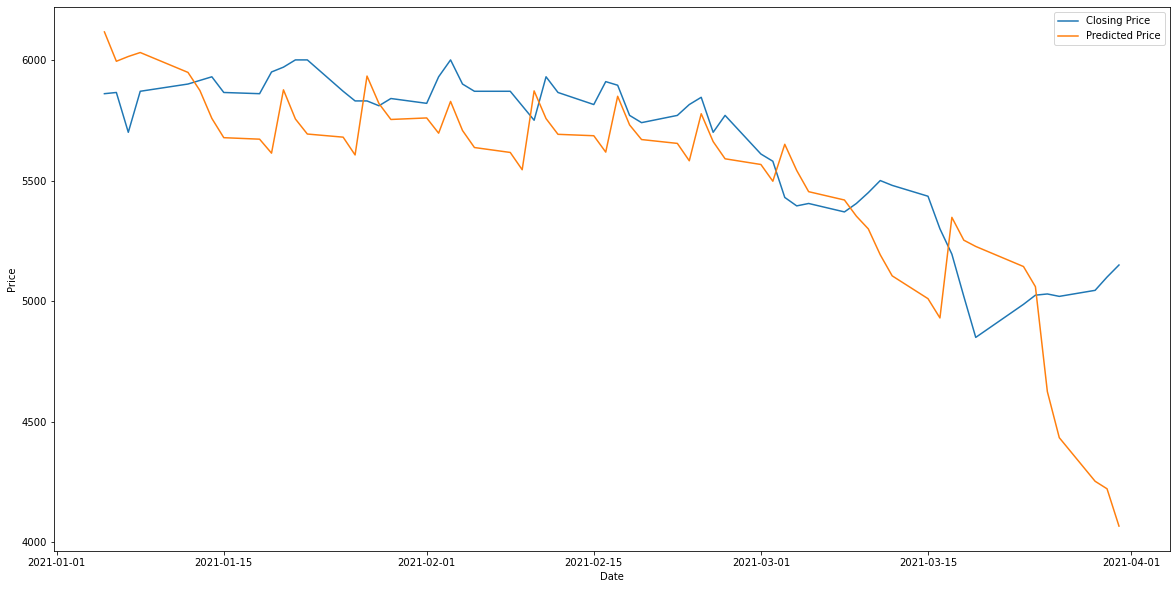

In [38]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], y_test.reshape(-1), label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [40]:
boll_weekly = CCB[['Date']]

price = np.array(training_data['Price'])
price = np.append(price, y_test_pred.reshape(-1))

boll_weekly['Price'] = price
boll_weekly['SMA'] = sma(boll_weekly['Price'], 10)
boll_weekly['upper_bb'], boll_weekly['lower_bb'] = bollinger(boll_weekly['Price'], boll_weekly['SMA'], 10)
boll_weekly

C:\Users\Chris\AppData\Local\Temp/ipykernel_17900/223031096.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_weekly['Price'] = price
C:\Users\Chris\AppData\Local\Temp/ipykernel_17900/223031096.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_weekly['SMA'] = sma(boll_weekly['Price'], 10)
C:\Users\Chris\AppData\Local\Temp/ipykernel_17900/223031096.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

,Date,Price,SMA,upper_bb,lower_bb
0,2020-01-02,7120.000000,NaN,NaN,NaN
1,2020-01-03,7000.000000,NaN,NaN,NaN
2,2020-01-07,6950.000000,NaN,NaN,NaN
3,2020-01-08,6880.000000,NaN,NaN,NaN
4,2020-01-09,6810.000000,NaN,NaN,NaN
...,...,...,...,...,...
298,2021-03-25,4625.255859,5089.462402,5497.030128,4681.894677
299,2021-03-26,4434.314941,5013.672314,5585.207993,4442.136636
300,2021-03-29,4253.800293,4928.552002,5668.395458,4188.708546
301,2021-03-30,4222.539062,4849.759961,5709.021231,3990.498691


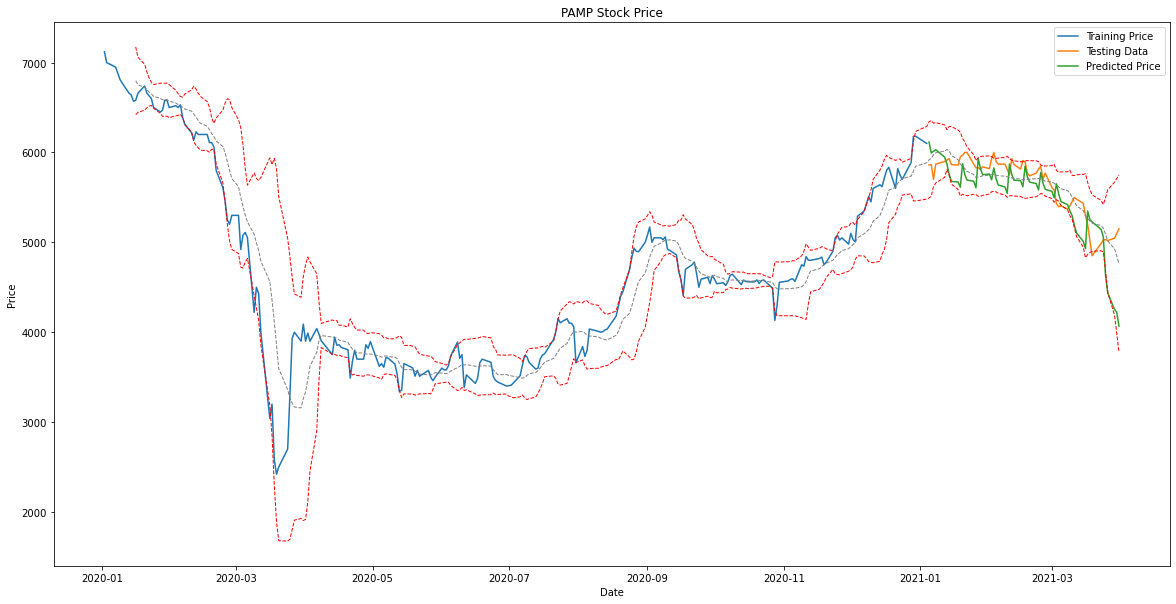

In [41]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_weekly['Date'], boll_weekly['upper_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'], boll_weekly['lower_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'], boll_weekly['SMA'], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('PAMP Stock Price')
plt.legend()
plt.show()

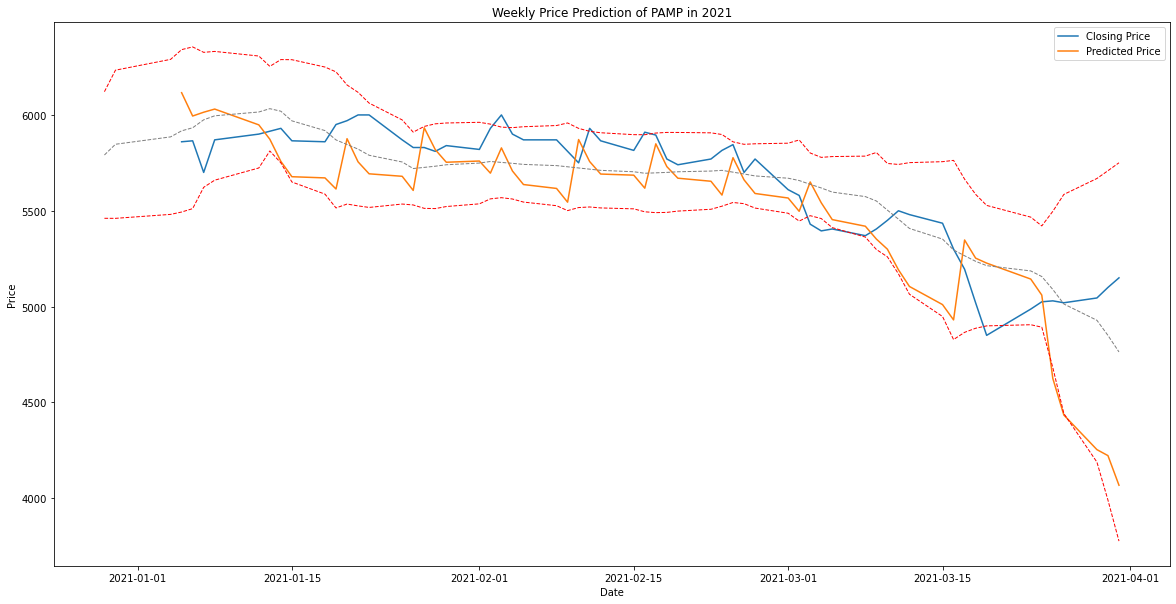

In [42]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], testing_data['Price'], label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_weekly['Date'][240:], boll_weekly['upper_bb'][240:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'][240:], boll_weekly['lower_bb'][240:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'][240:], boll_weekly['SMA'][240:], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Weekly Price Prediction of PAMP in 2021')
plt.legend()
plt.show()

# Monthly

In [69]:
model = LSTM(input_dim=1, hidden_dim=50, output_dim=20, num_layers=2)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

print(model)

LSTM(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=20, bias=True)
)


In [70]:
X_train_m, y_train_m = get_monthly_train_data(scaled_train_data, 25)
X_test_m, y_test_m = get_monthly_test_data(CCB, testing_data, scaler, 25)

In [71]:
X_train_m = torch.from_numpy(X_train_m).type(torch.Tensor)
X_test_m = torch.from_numpy(X_test_m).type(torch.Tensor)
y_train_m = torch.from_numpy(y_train_m).type(torch.Tensor)
y_test_m = torch.from_numpy(y_test_m).type(torch.Tensor)

In [72]:
num_epochs = 200

hist = np.zeros(num_epochs)
lstm = []
for t in range(num_epochs):
    y_train_pred = model(X_train_m)    
    
    loss = criterion(y_train_pred, y_train_m)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()    
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch  0 MSE:  0.22753073275089264
Epoch  1 MSE:  0.17142988741397858
Epoch  2 MSE:  0.11371516436338425
Epoch  3 MSE:  0.05304184928536415
Epoch  4 MSE:  0.09568611532449722
Epoch  5 MSE:  0.03147938847541809
Epoch  6 MSE:  0.04194546490907669
Epoch  7 MSE:  0.04873369261622429
Epoch  8 MSE:  0.04516793414950371
Epoch  9 MSE:  0.038971997797489166
Epoch  10 MSE:  0.035902731120586395
Epoch  11 MSE:  0.03684642165899277
Epoch  12 MSE:  0.037864092737436295
Epoch  13 MSE:  0.036176782101392746
Epoch  14 MSE:  0.03312841057777405
Epoch  15 MSE:  0.030863244086503983
Epoch  16 MSE:  0.030164379626512527
Epoch  17 MSE:  0.030584068968892097
Epoch  18 MSE:  0.03127845749258995
Epoch  19 MSE:  0.03160575404763222
Epoch  20 MSE:  0.03134232386946678
Epoch  21 MSE:  0.0306295957416296
Epoch  22 MSE:  0.029790382832288742
Epoch  23 MSE:  0.029125124216079712
Epoch  24 MSE:  0.028759263455867767
Epoch  25 MSE:  0.028584683313965797
Epoch  26 MSE:  0.028319844976067543
Epoch  27 MSE:  0.027676904

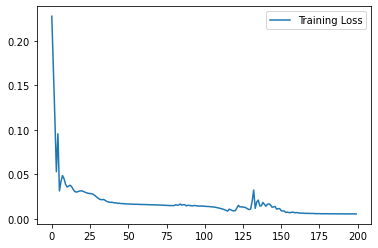

In [73]:
plt.plot(hist, label='Training Loss')
plt.legend()
plt.show()

In [74]:
y_train_pred = model(X_train_m)
y_test_pred = model(X_test_m)

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_m.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_m.detach().numpy())

trainScore = np.sqrt(mean_squared_error(y_train_m[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test_m[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 4630.69 RMSE
Test Score: 5874.63 RMSE


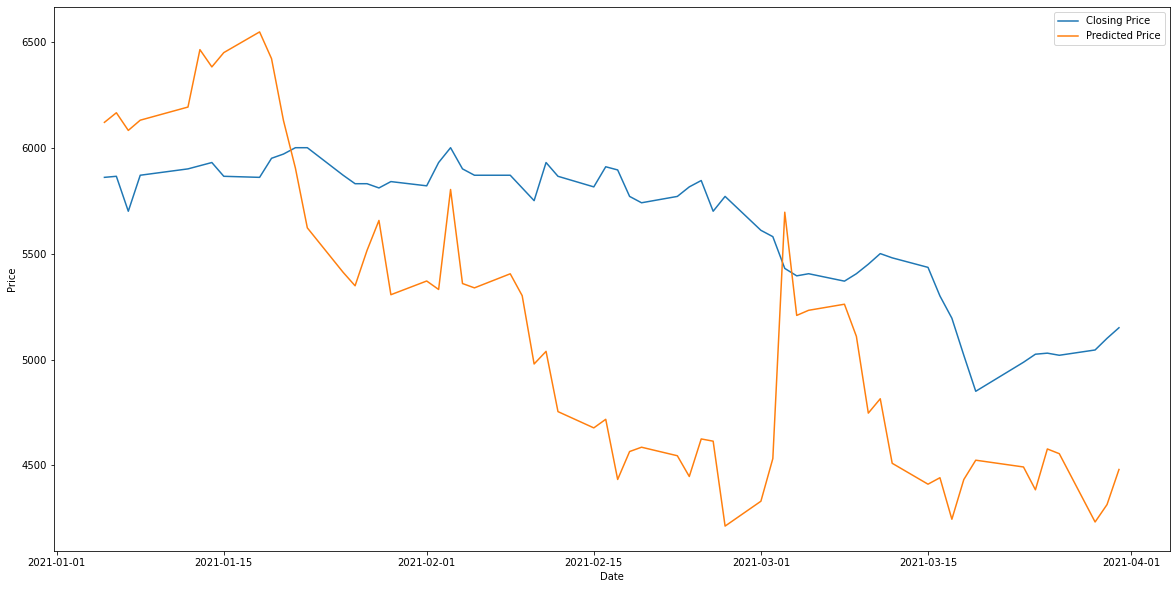

In [75]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], y_test.reshape(-1), label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [76]:
boll_monthly = CCB[['Date']]

price = np.array(training_data['Price'])
price = np.append(price, y_test_pred.reshape(-1))

boll_monthly['Price'] = price
boll_monthly['SMA'] = sma(boll_monthly['Price'], 10)
boll_monthly['upper_bb'], boll_monthly['lower_bb'] = bollinger(boll_monthly['Price'], boll_monthly['SMA'], 10)
boll_monthly

C:\Users\Chris\AppData\Local\Temp/ipykernel_17900/4124782532.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_monthly['Price'] = price
C:\Users\Chris\AppData\Local\Temp/ipykernel_17900/4124782532.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_monthly['SMA'] = sma(boll_monthly['Price'], 10)
C:\Users\Chris\AppData\Local\Temp/ipykernel_17900/4124782532.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

,Date,Price,SMA,upper_bb,lower_bb
0,2020-01-02,7120.000000,NaN,NaN,NaN
1,2020-01-03,7000.000000,NaN,NaN,NaN
2,2020-01-07,6950.000000,NaN,NaN,NaN
3,2020-01-08,6880.000000,NaN,NaN,NaN
4,2020-01-09,6810.000000,NaN,NaN,NaN
...,...,...,...,...,...
298,2021-03-25,4577.643555,4483.662061,4779.330292,4187.993829
299,2021-03-26,4555.328613,4457.730225,4652.728587,4262.731862
300,2021-03-29,4232.908691,4430.019824,4666.369297,4193.670351
301,2021-03-30,4315.146973,4420.401758,4667.706085,4173.097431


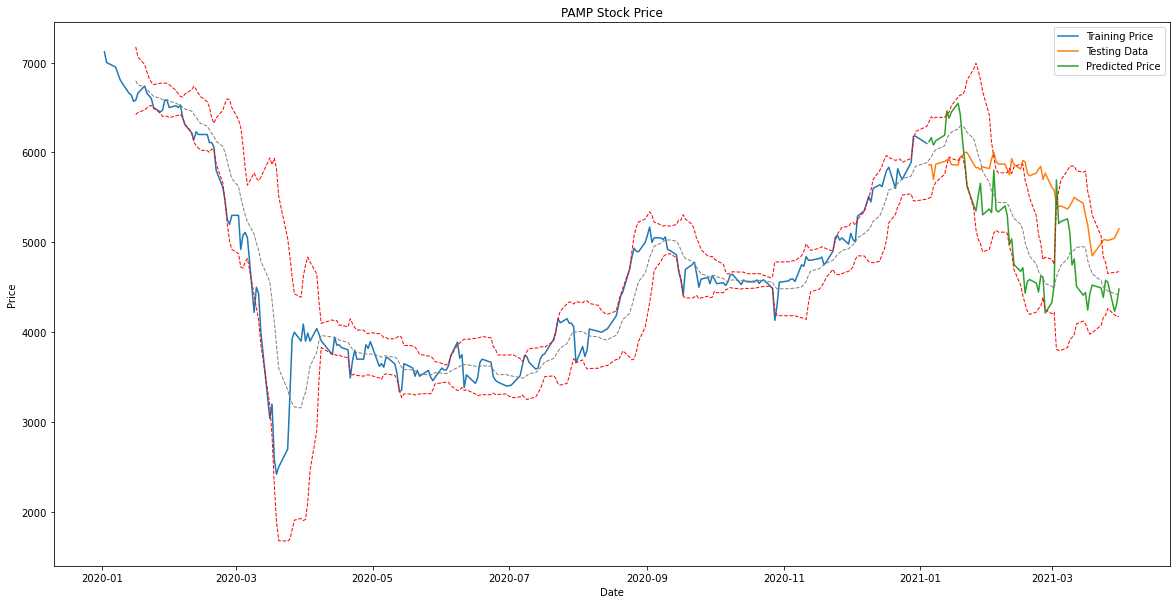

In [77]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_monthly['Date'], boll_monthly['upper_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'], boll_monthly['lower_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'], boll_monthly['SMA'], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('PAMP Stock Price')
plt.legend()
plt.show()

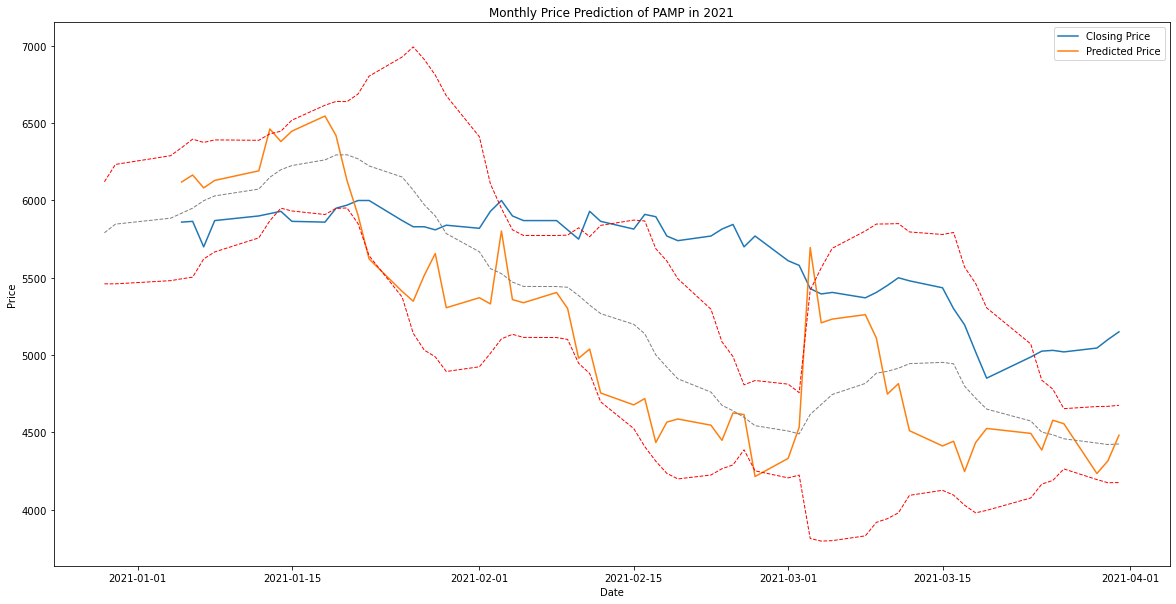

In [78]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], testing_data['Price'], label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_monthly['Date'][240:], boll_monthly['upper_bb'][240:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'][240:], boll_monthly['lower_bb'][240:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'][240:], boll_monthly['SMA'][240:], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Monthly Price Prediction of PAMP in 2021')
plt.legend()
plt.show()